# Case Study on Lead Score 

## Problem Statement 

An education company named X Education sells need help to imporove their hot leadDf from 30% to at least 80%,
The leadDf that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leadDf such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance

#### Import Libraries 

In [66]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#### Data Reading 

In [67]:
leadDf = pd.read_csv("data/leadDf.csv")
leadDf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### As we can see we have 37 columns, some of them categorical data & some are numeric data & some data columns have string value, so now we are going to understand the data


In [68]:
leadDf.shape

(9240, 37)

##### We have total 9240 records

## Data understanding & Data cleanup

#### Data understanding

In [69]:
##### In few columns we have value as "select", which means users are not selected any value for that column, so we can consider it as null and replaced it by nan
leadDf.replace("Select",np.nan,inplace=True)
leadDf.replace("How did you hear about X Education",np.nan,inplace=True)



In [70]:
leadDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Null Count Check for every column of data frame 

In [71]:
columns_null_count=leadDf.isnull().sum()
print(columns_null_count)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

###### Total 17th column have null value

In [72]:
##### Numerical data descriptions
leadDf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [73]:
## creating a method to check null percentage of dataframe
def getNullPercentage(dataFrame):
    return round(100*(dataFrame.isnull().sum()/len(dataFrame.index)), 2)

In [74]:
## creating a method to check unique value givn columns
def getUniqueValue(dataFrame, column):
    return dataFrame[column].astype('category').value_counts()


In [75]:
# Check the column with null percentages.

print(getNullPercentage(leadDf))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [76]:
# check the unique value for all the columns of data frame 
leadDf.apply(lambda x: len(x.unique()))


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        22
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        42
Total Time Spent on Website                      1731
Page Views Per Visit                              115
Last Activity                                      18
Country                                            39
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article           

#### Data cleanup

In [77]:
##### creating function to remove column
def removeColumn(columns):
    leadDf.drop(columns,axis=1,inplace=True)

In [78]:
##### Prospect ID, Lead Number both are unique identifire for this data frame so we can remove them
removeColumn("Prospect ID")
removeColumn("Lead Number")


In [79]:
#### removing the columns which have only one scpecific value in all the rows, because these will not affect on our model
removeColumn(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

<h3 style="color:red"><storng > We can see that we have many columns have high percentage null value</storng>, so we can delete the column which have null value more than <b>35%</b> </h3>

In [80]:
getNullPercentage(leadDf)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [81]:
## Column Specialization & Tags have null percentage around 36% and it's seems like this is important data for our model and if we delete all the value greator than 35 % so we will lost data hence we are replacing the null value by not provided for columns "Country, Specialization, What is your current occupation, What matters most to you in choosing a course & tags"
leadDf['Country'] = leadDf['Country'].fillna('NA')
leadDf['Specialization'] = leadDf['Specialization'].fillna('NA') 
leadDf['What is your current occupation'] = leadDf['What is your current occupation'].fillna('NA') 
leadDf['What matters most to you in choosing a course'] = leadDf['What matters most to you in choosing a course'].fillna('NA') 
leadDf['Tags'] = leadDf['Tags'].fillna('NA') 


<h5>Dropping the columns which have null value percentage more than 35% </h5>

In [82]:
#Drop all the columns which have more than 35% missing values
cols=leadDf.columns

for col in cols:
    if((100*(leadDf[col].isnull().sum()/len(leadDf.index))) >= 35):
        removeColumn(col)

In [83]:
## after removing null more than 35%, again checking null percentage of data frame
getNullPercentage(leadDf)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [84]:
# We can see that, remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leadDf.dropna(inplace=True)


In [85]:
leadDf["Country"].value_counts()

India                   6491
NA                      2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [86]:
## in the country column mosty have value India, not provided (NA) so we can update country column data into three category like "India", "NA" and "out of India"

## Create a method for country category 
def slots(value):
    value=value.lower()
    category = ""
    if value == "india":
        category = "india"
    elif value == "na":
        category = "na"
    else:
        category = "outside india"
    return category

leadDf['Country'] = leadDf.apply(lambda x:slots(x['Country']), axis = 1)
leadDf['Country'].value_counts()

india            6491
na               2296
outside india     287
Name: Country, dtype: int64

In [87]:
## Again checking the null values percentage

getNullPercentage(leadDf)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

##### Now we are under standing categorical data

In [88]:
## we are checking unique value for all the columns of data frame

for col in leadDf.columns:
    print("******* Unique value of Column:",col," *******",)
    print(getUniqueValue(leadDf,col),"\n")


******* Unique value of Column: Lead Origin  *******
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64 

******* Unique value of Column: Lead Source  *******
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64 

******* Unique value of Column: Do Not Email  *******
No     8358
Yes     716
Name: Do Not Email, dtype: int64 

******* Unique value of Column: Do Not 

<h4><strong> After unique value check, we can see that, few columns have value in binary format like yes/no and few columns have lot of varaity in values for cateogrical data  </strong><h4>

# Exploratoary Data Analysis (EDA)

Univariate Data Analysis

<h3 style="color:red"><storng > Categorical Variables</storng>

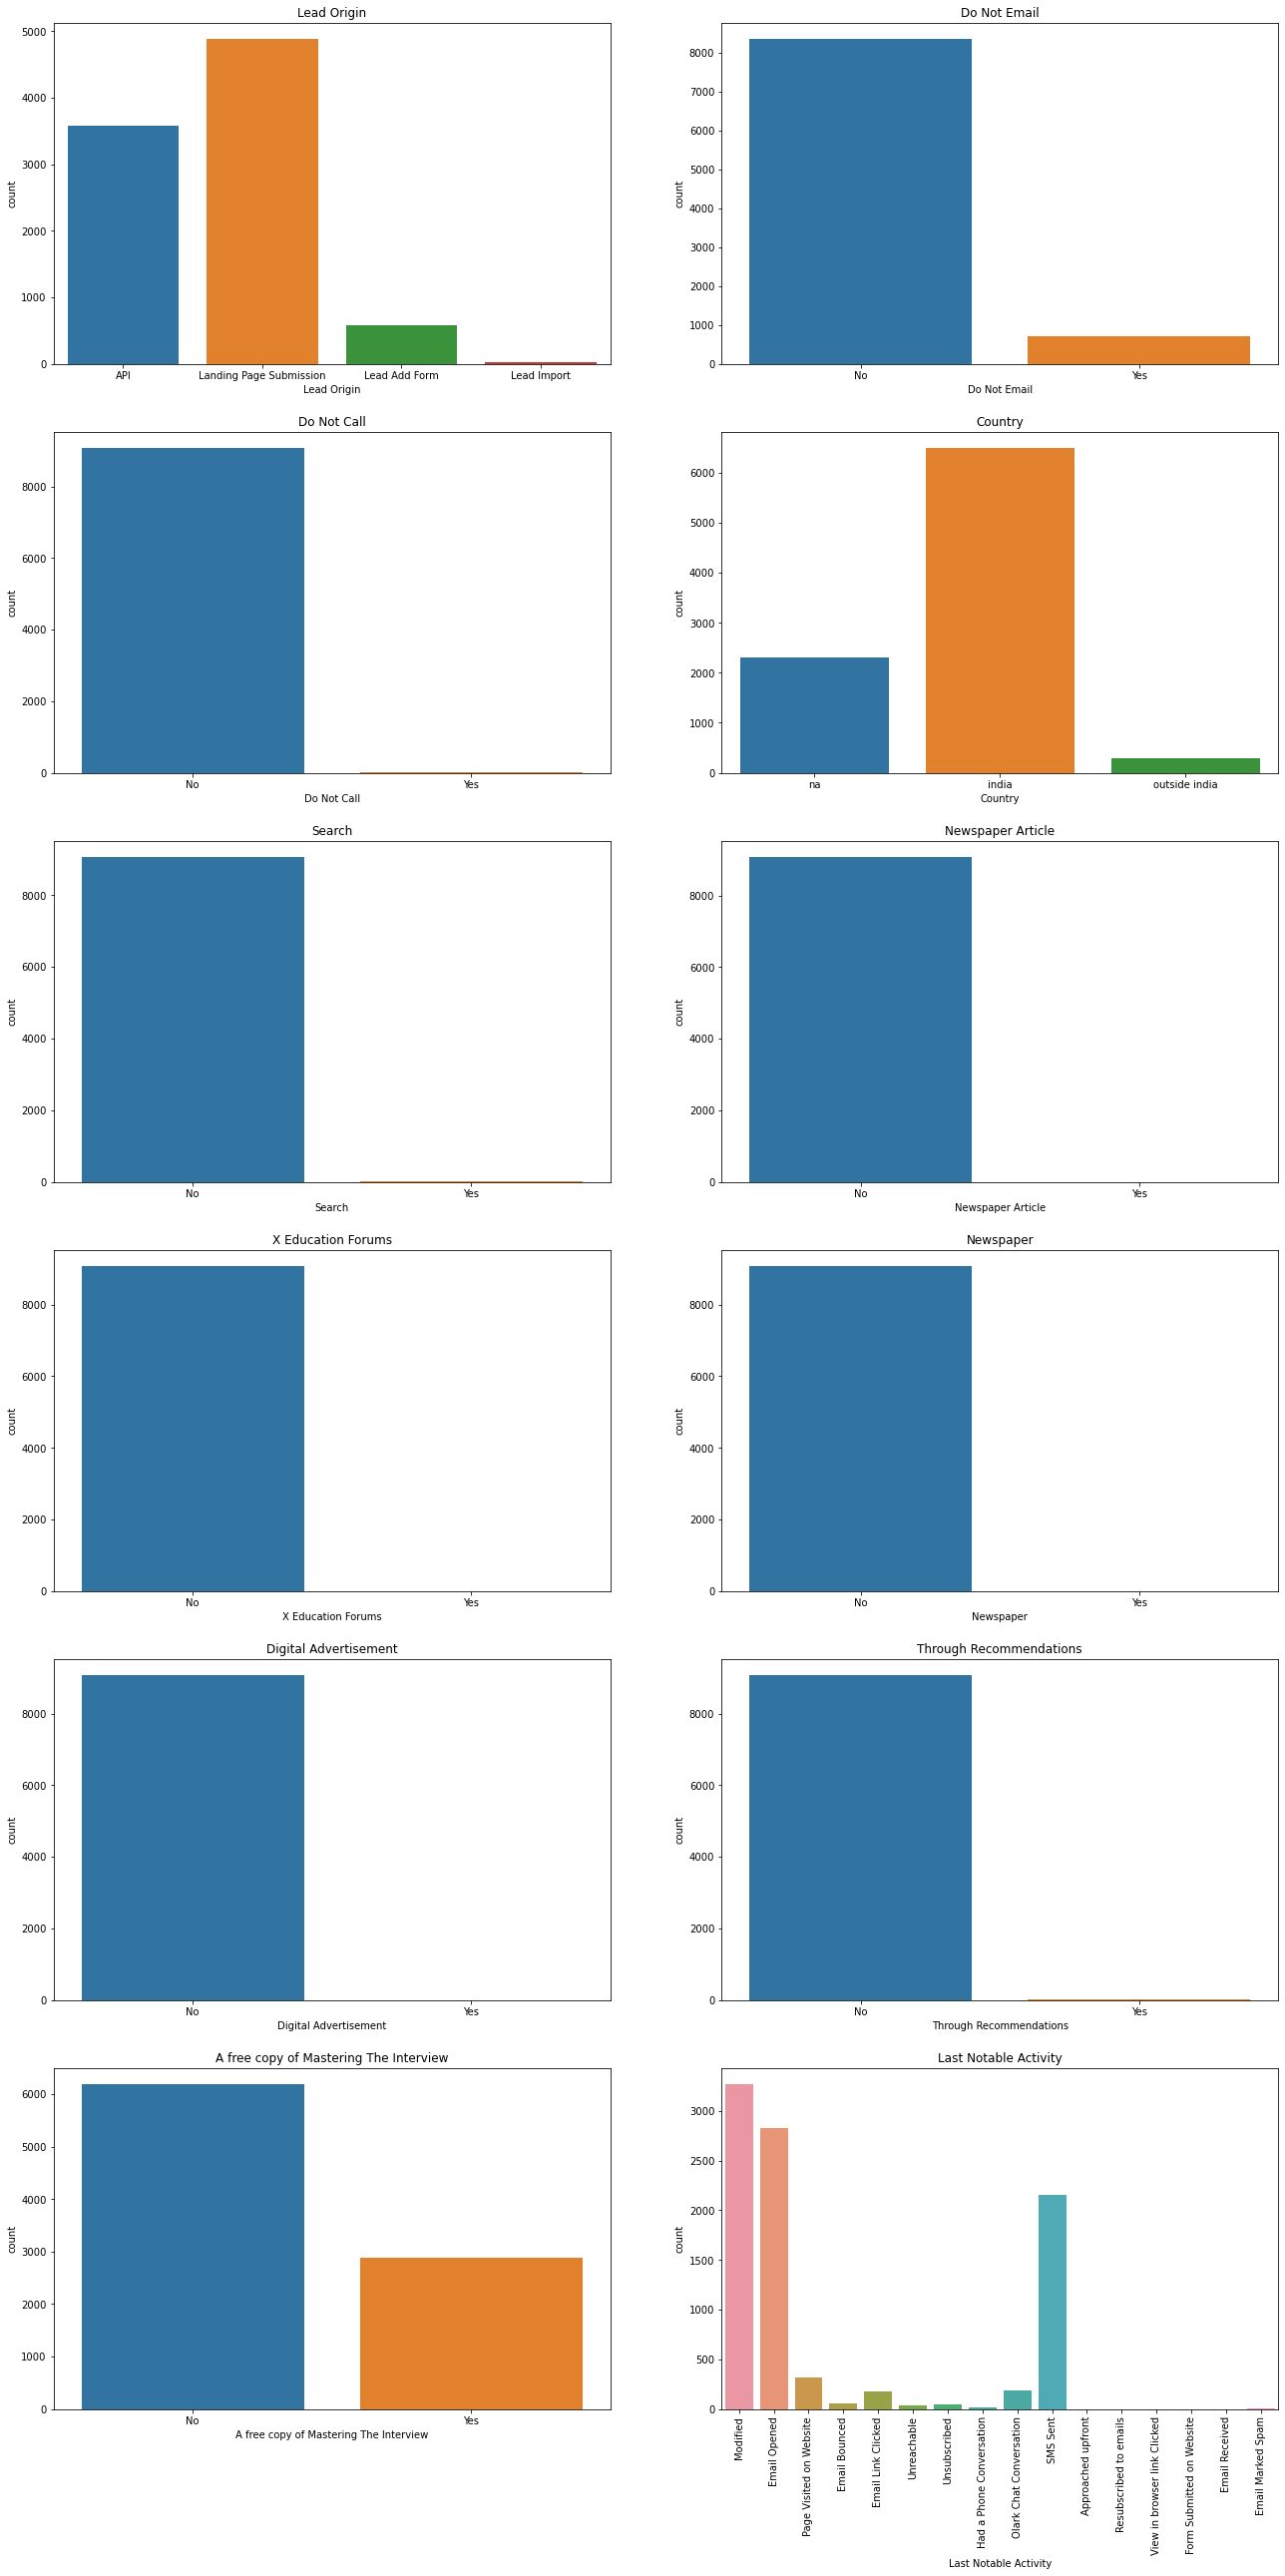

In [127]:
plt.figure(figsize = (22,44))

# count plot for 'Lead Origin'
plt.subplot(6,2,1)
sns.countplot(leadDf['Lead Origin'])
plt.title('Lead Origin')

# poltting count plot for 'Do Not Email'
plt.subplot(6,2,2)
sns.countplot(leadDf['Do Not Email'])
plt.title('Do Not Email')

# poltting count plot for 'Do Not Call'
plt.subplot(6,2,3)
sns.countplot(leadDf['Do Not Call'])
plt.title('Do Not Call')

# poltting count plot for 'Country'
plt.subplot(6,2,4)
sns.countplot(leadDf['Country'])
plt.title('Country')

# poltting count plot for 'Search'
plt.subplot(6,2,5)
sns.countplot(leadDf['Search'])
plt.title('Search')

# poltting count plot for 'Newspaper Article'
plt.subplot(6,2,6)
sns.countplot(leadDf['Newspaper Article'])
plt.title('Newspaper Article')

# poltting count plot for 'X Education Forums'
plt.subplot(6,2,7)
sns.countplot(leadDf['X Education Forums'])
plt.title('X Education Forums')

# poltting count plot for 'Newspaper'
plt.subplot(6,2,8)
sns.countplot(leadDf['Newspaper'])
plt.title('Newspaper')

# poltting count plot for 'Digital Advertisment'
plt.subplot(6,2,9)
sns.countplot(leadDf['Digital Advertisement'])
plt.title('Digital Advertisement')

# poltting count plot for 'Through Recommendations'
plt.subplot(6,2,10)
sns.countplot(leadDf['Through Recommendations'])
plt.title('Through Recommendations')

# poltting count plot for 'A free copy of Mastering The Interview'
plt.subplot(6,2,11)
sns.countplot(leadDf['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

# poltting count plot for 'Last Notable Activity'
plt.subplot(6,2,12)
sns.countplot(leadDf['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

<ul style="green">
<li> Landing page & Api has highest count for lead profile and Lead ADD form & lead import has very less count </li>
<li> Most of people, more than 8000 are responded Yes for Do not email and only few users below 1000, responded as yes for Do Not Email</li>
<li> More than 8000 people responded as No for Do not call and only few people responded as yes for 'Do No call', 'Search', 'Newspaper Article', 'X Education' AND 'Newspaper'</li>
<li> Most of people responded from India, few of them responded from outside of india and around 2200 users not responded for country</li>
<li> More than 6000 users responded as no and almost 3000 users responded as yes for 'A free Copy Of Mastring In Interview' </li>
<li> In Last activity Modified, email opened, sent msg have higher number of count </li>
</ul>

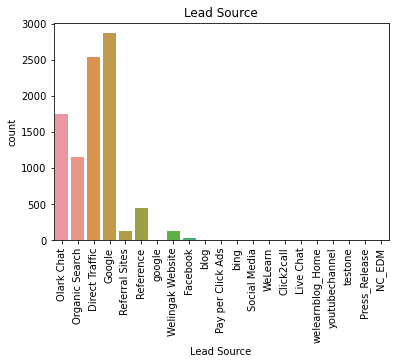

In [91]:
sns.countplot(leadDf['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

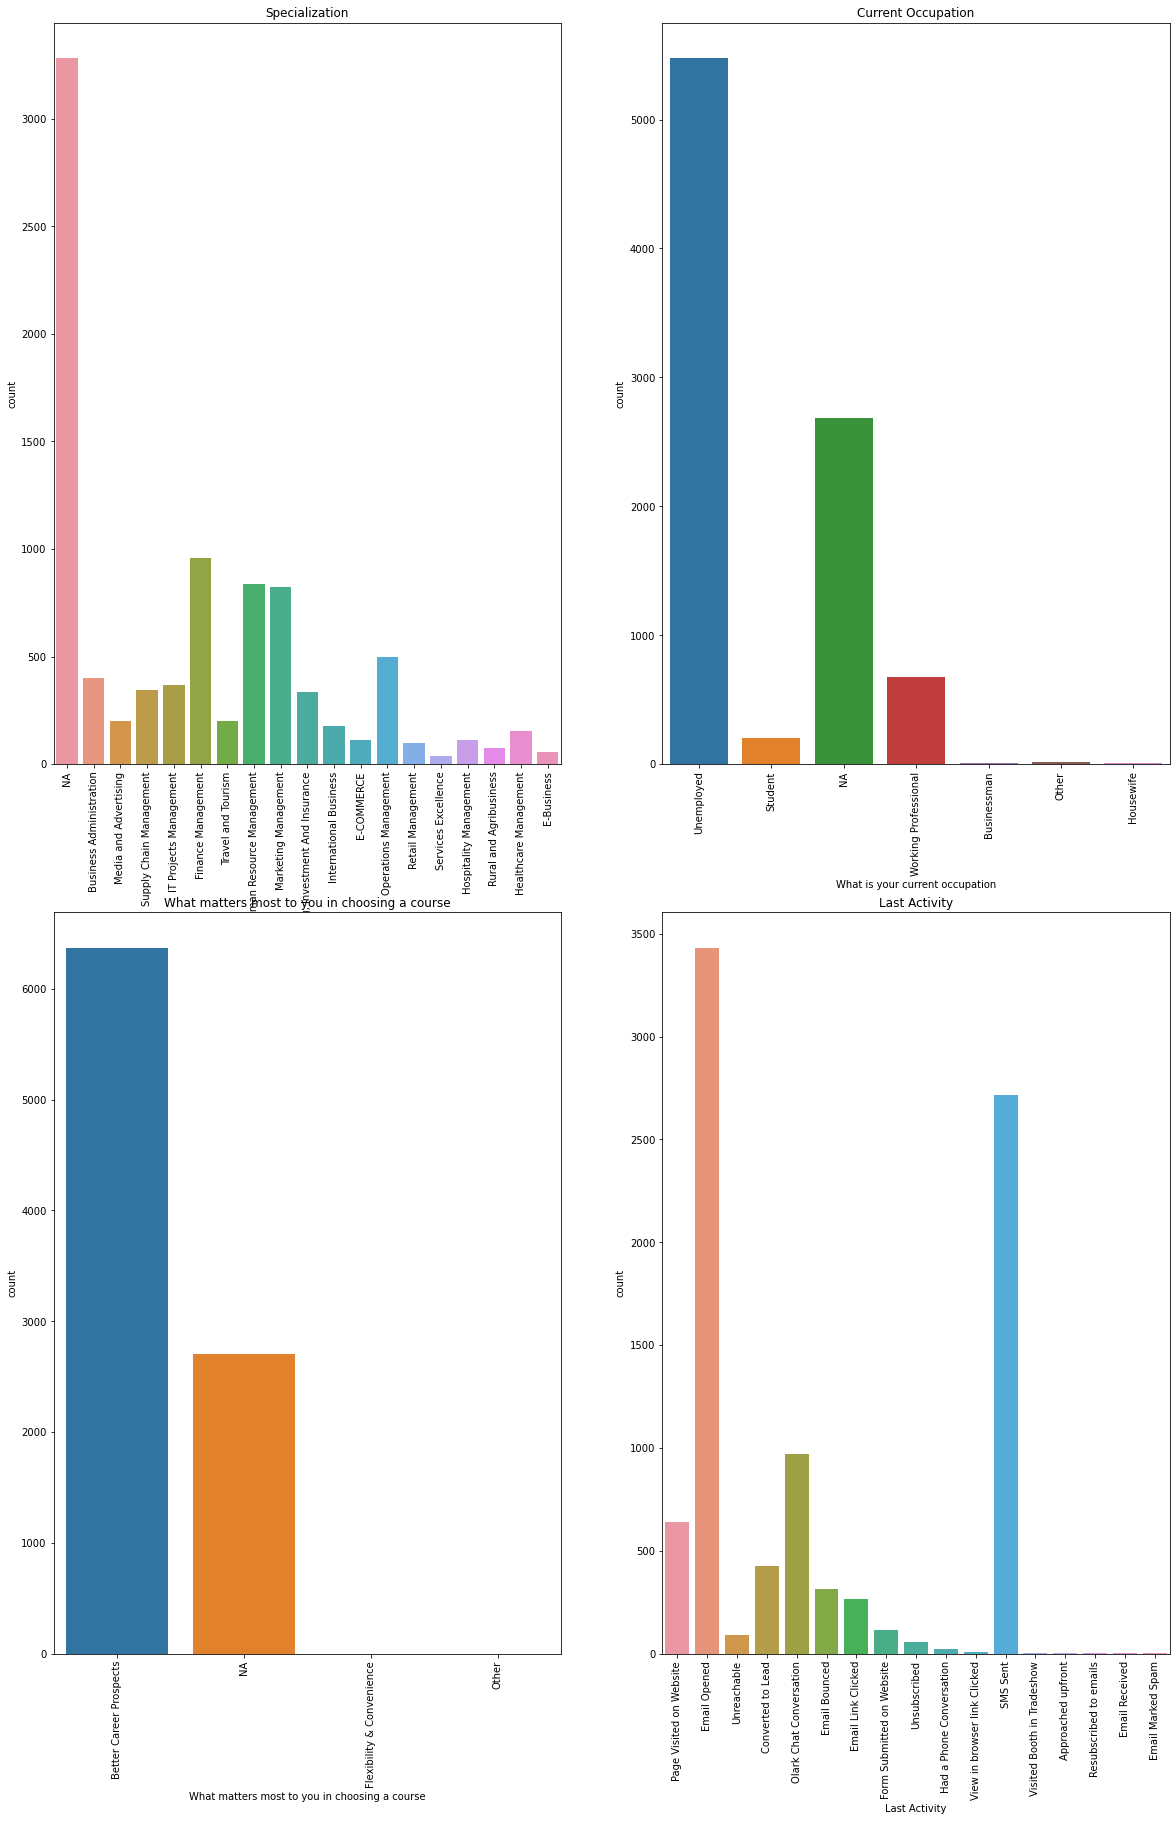

In [92]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(leadDf['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(leadDf['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(leadDf['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(leadDf['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

<ul style="green">
<li> More than 3000 users not resonded for specialization details,  </li>
<li> Top 3 specialization selected by users is 1.Finance Management, 2. human Resources Management, 3. Marketing Management </li>
<li> Mostly users are unemplyed.</li>
<li> More than 6000 users are joined the course for Batter career perspective </li>
</ul>

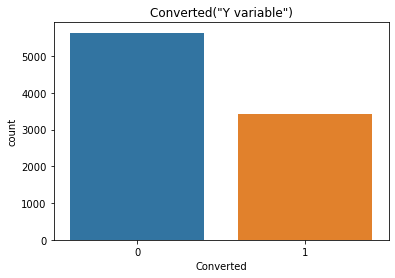

In [93]:
# Count plot for 'Converted', Where O for 'No'and 1 for 'Yes'
sns.countplot(leadDf['Converted'])
plt.title('Converted("Y variable")')
plt.show()

<ul style="color:green"><li> More than 5000 users not converted </li></ul>

### Checking Outliers

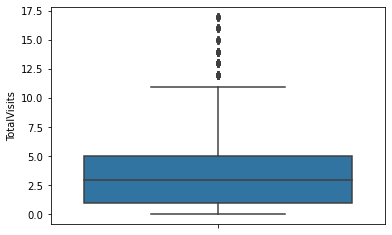

In [129]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leadDf['TotalVisits'])
plt.show()

In [130]:
#checking percentile values for "Total Visits"

leadDf['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8970.000000
mean        3.191304
std         2.944647
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        17.000000
Name: TotalVisits, dtype: float64

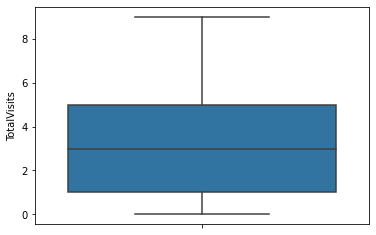

In [131]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leadDf['TotalVisits'].quantile([0.05,0.95]).values
leadDf['TotalVisits'][leadDf['TotalVisits'] <= percentiles[0]] = percentiles[0]
leadDf['TotalVisits'][leadDf['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leadDf['TotalVisits'])
plt.show()

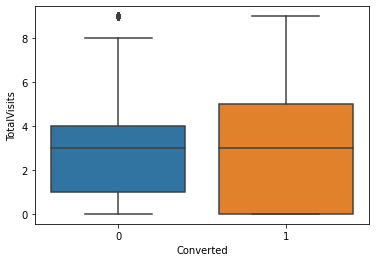

In [132]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadDf)
plt.show()

<h3 style="color:red"><storng >Numerical Variables</storng>

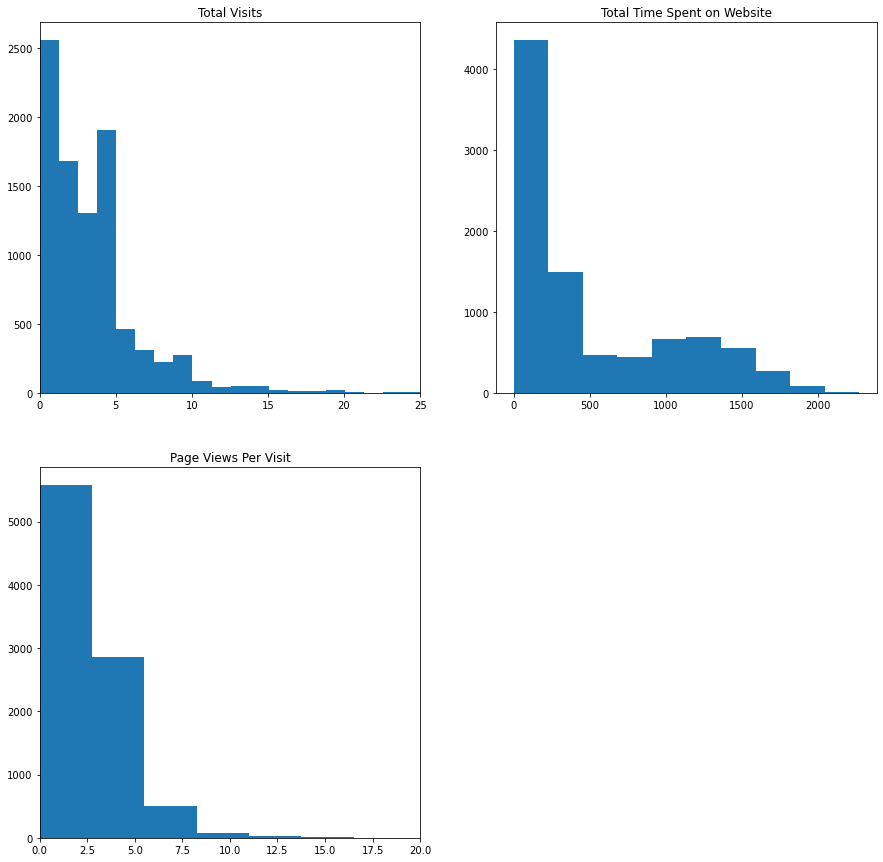

In [94]:
plt.figure(figsize = (15,15))
plt.subplot(221)
 
# Plotting histogram plot for 'TotalVisits'
plt.hist(leadDf['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)
 
# Plotting histogram plot for 'Total Time Spent on Website'
plt.subplot(222)
plt.hist(leadDf['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')
 
# Plotting histogram plot for 'Page Views Per Visit'
plt.subplot(223)
plt.hist(leadDf['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## Bivariate Analysis

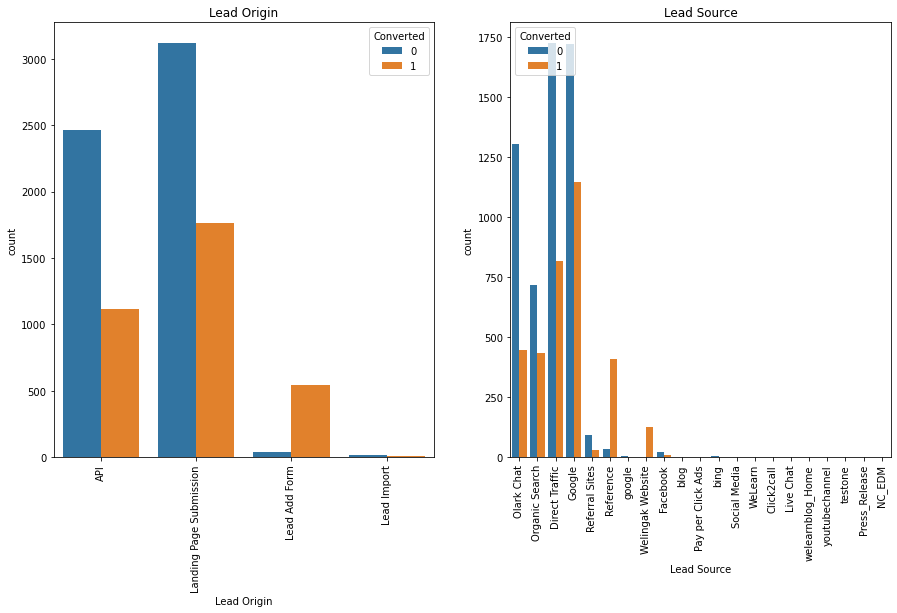

In [95]:
plt.figure(figsize = (15,8))

# Plotting count plot for 'Lead Origin' with 'Converted'
plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

# Plotting count plot for 'Lead Source' with 'Converted'
plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

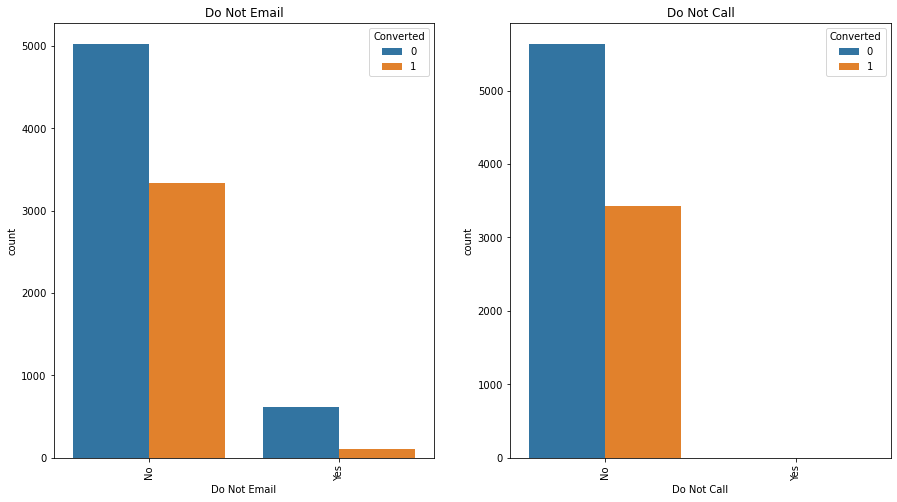

In [96]:
plt.figure(figsize = (15,8))

# Plotting count plot for 'Do Not Email' and 'Converted'
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

# Plotting count plot for 'Do Not Call' and 'Converted'
plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

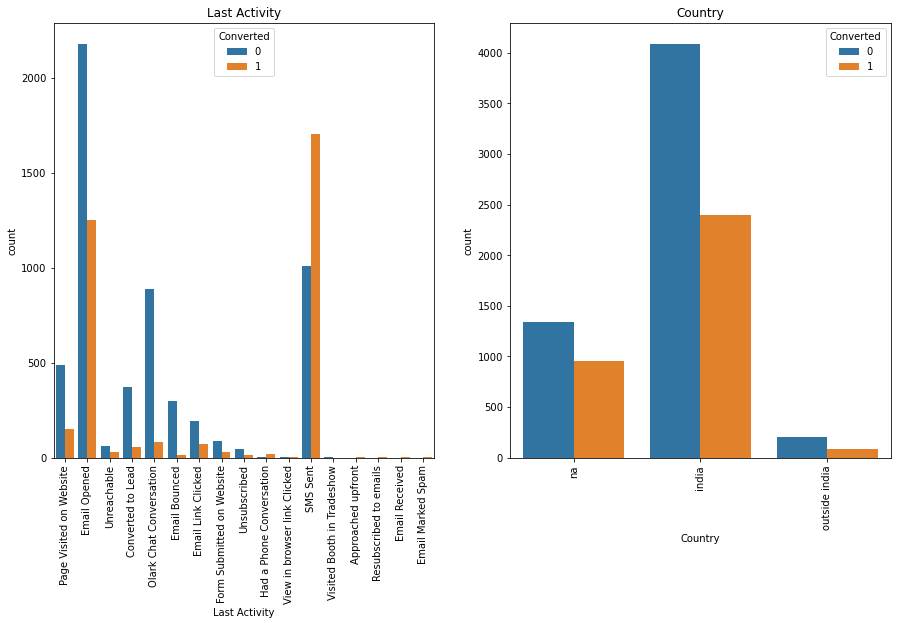

In [97]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

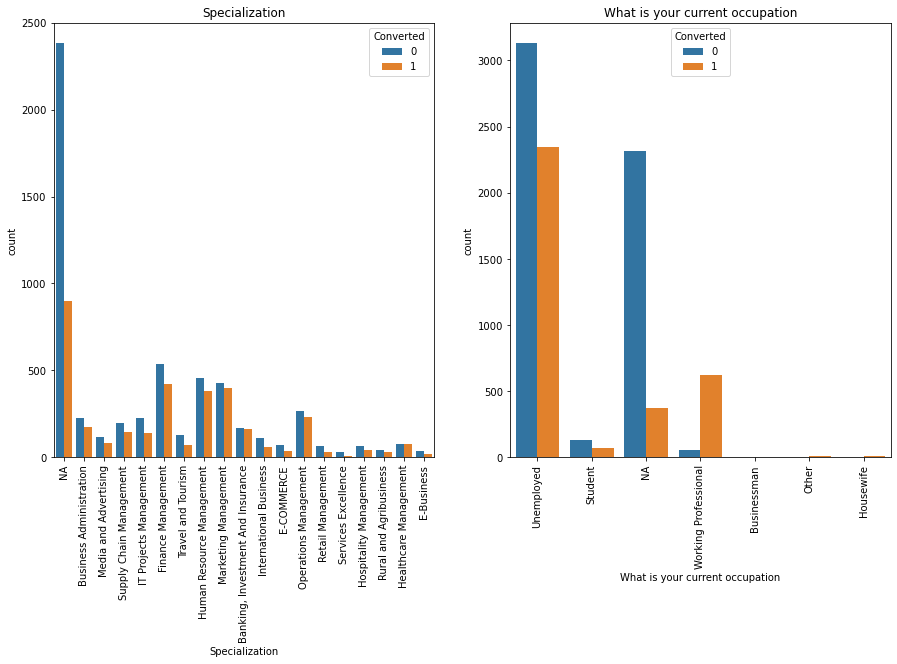

In [98]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

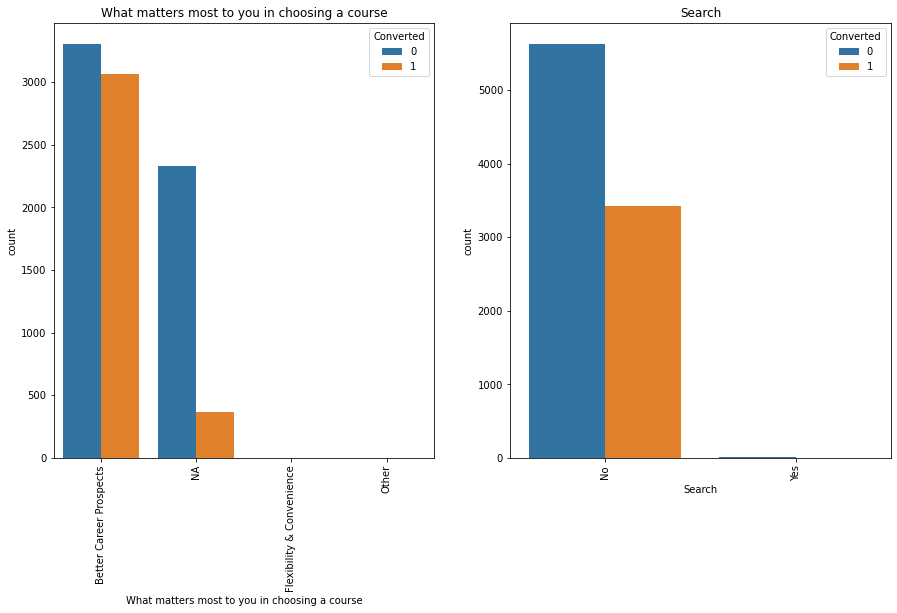

In [99]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

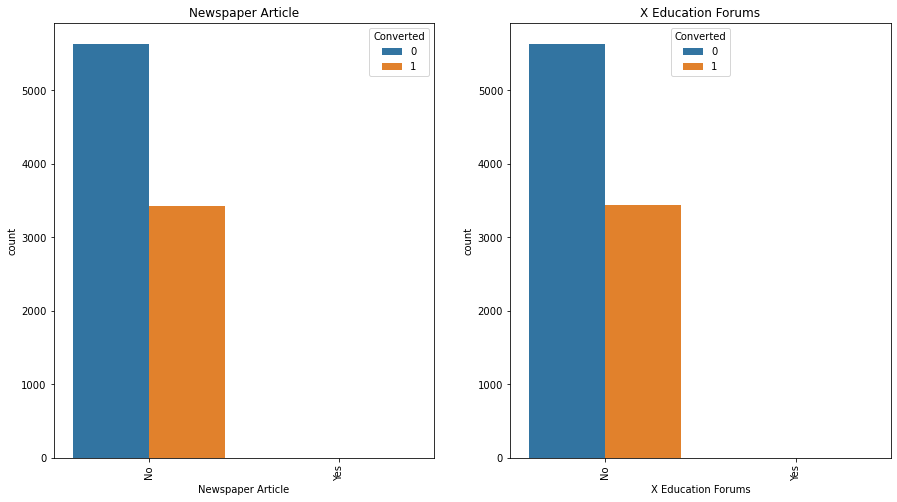

In [100]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

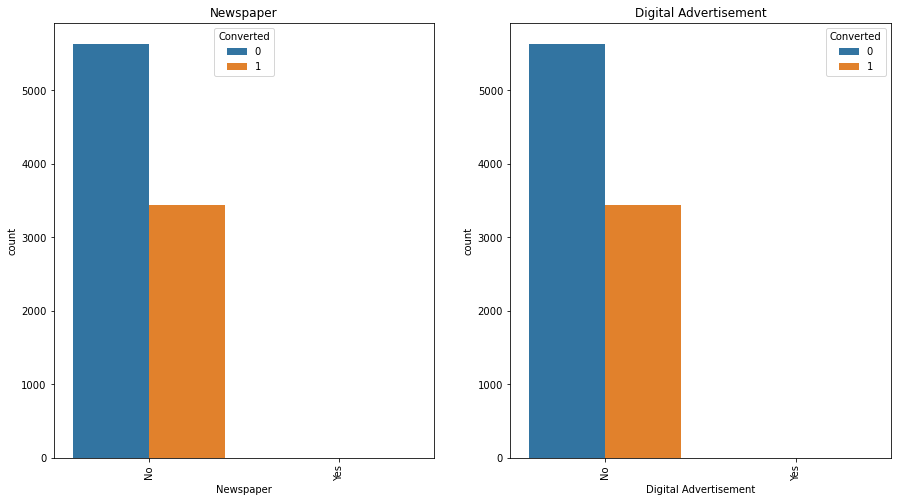

In [101]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

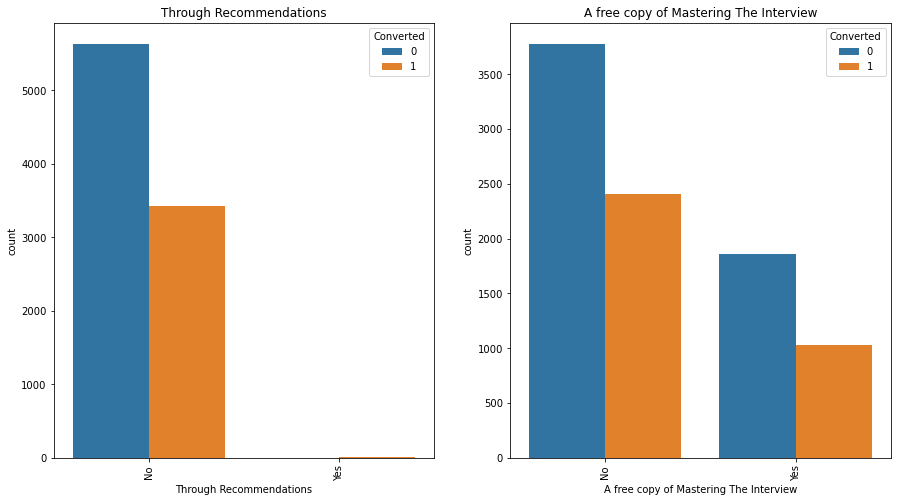

In [102]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

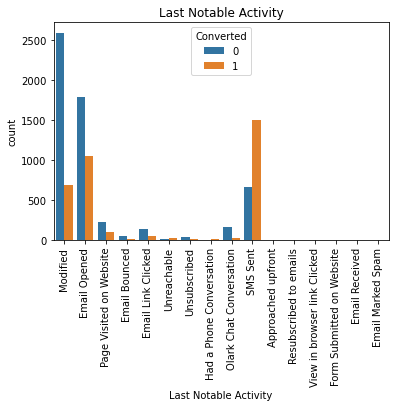

In [103]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= leadDf).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

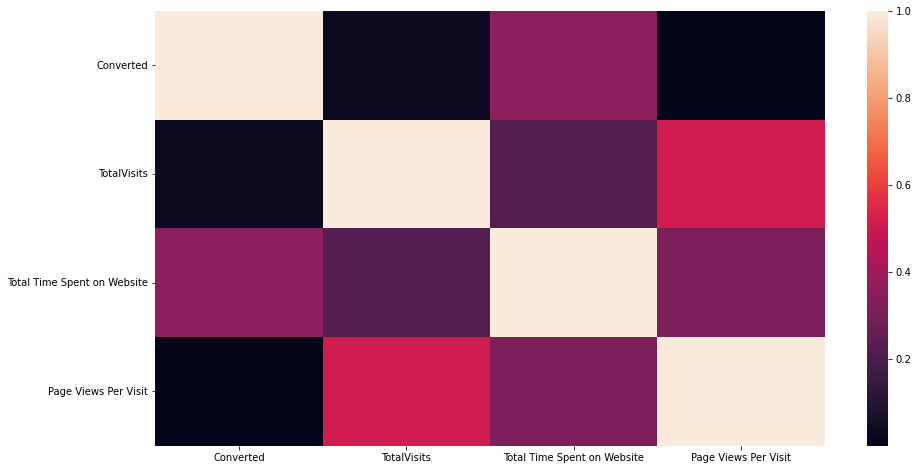

In [104]:
# To check the correlation among varibles
plt.figure(figsize=(15,8))
sns.heatmap(leadDf.corr())
plt.show()

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.



In [105]:
numeric = leadDf[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


There aren't any major outliers, so moving on to analysis

# Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [133]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leadDf[varlist] = leadDf[varlist].apply(binary_map)

In [134]:
leadDf.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,No,0,0.0,0,0.0,Page Visited on Website,na,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,0,No,0,5.0,674,2.5,Email Opened,india,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,No,1,2.0,1532,2.0,Email Opened,india,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,No,0,1.0,305,1.0,Unreachable,india,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,0,No,1,2.0,1428,1.0,Converted to Lead,india,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [136]:
leadDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8970 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8970 non-null   object 
 1   Lead Source                                    8970 non-null   object 
 2   Do Not Email                                   8970 non-null   int64  
 3   Do Not Call                                    8970 non-null   object 
 4   Converted                                      8970 non-null   int64  
 5   TotalVisits                                    8970 non-null   float64
 6   Total Time Spent on Website                    8970 non-null   int64  
 7   Page Views Per Visit                           8970 non-null   float64
 8   Last Activity                                  8970 non-null   object 
 9   Country                                        8970 

Dummy Variable Creation

In [138]:
#getting a list of categorical columns foy creating dummy

cat_cols= leadDf.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [141]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leadDf[['Lead Origin']], drop_first=True)
leadDf = pd.concat([leadDf,dummy],1)



dummy = pd.get_dummies(leadDf['Lead Source'], prefix  = 'Lead Source')
leadDf = pd.concat([leadDf, dummy], axis = 1)


dummy = pd.get_dummies(leadDf['What is your current occupation'], prefix  = 'What is your current occupation')
leadDf = pd.concat([leadDf, dummy], axis = 1)

In [142]:
#dropping the original columns after dummy variable creation

leadDf.drop(cat_cols,1,inplace = True)

In [144]:
#checking dataset after dummy variable creation
leadDf.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Test-Train Split

In [145]:
# Putting feature variable to X
X=leadDf.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [146]:
# Putting response variable to y
y = leadDf['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [147]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [148]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3825,-0.294143,-1.177675,-0.885830,-1.155787,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3307,-0.294143,0.363674,1.481982,0.848717,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5527,-0.294143,-1.177675,-0.885830,-1.155787,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5180,-0.294143,-1.177675,-0.885830,-1.155787,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7064,-0.294143,1.519686,1.410174,2.352095,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [149]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

37.803790412486066

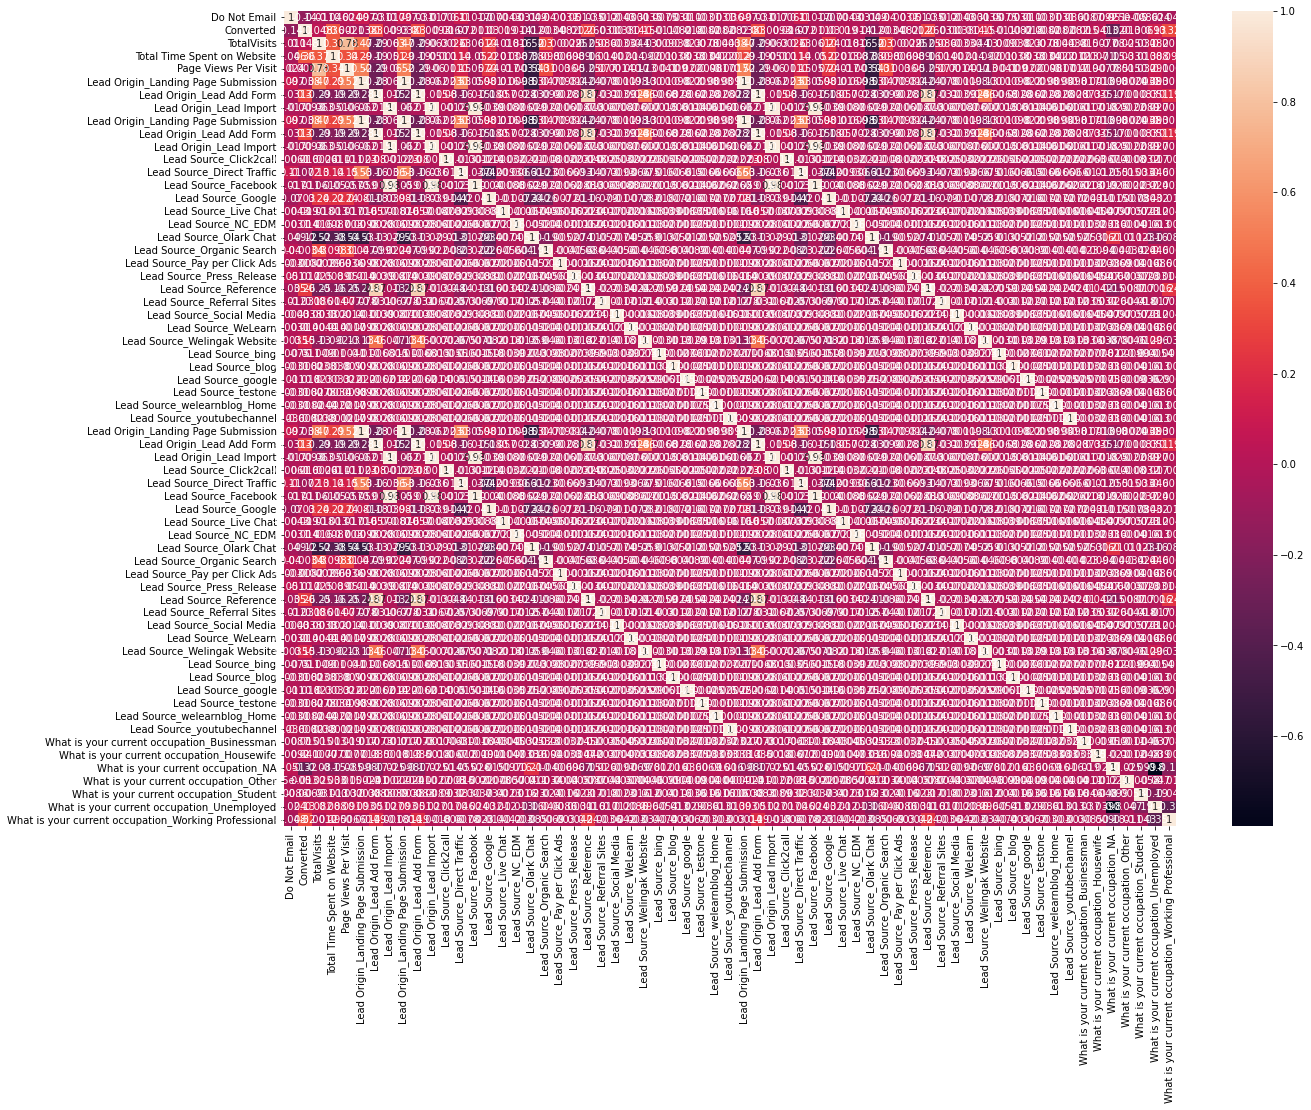

In [150]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leadDf.corr(),annot = True)
plt.show()

<h3 style="color:blue"><storng >Dropping highly correlated dummy variables</storng>

# Model Building using Stats Model & RFE

In [151]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [152]:
rfe.support_

array([False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True])

In [153]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 12),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Click2call', False, 6),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 16),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 31),
 ('Lead Source_WeLearn', False, 47),
 ('Lead Source_Welingak Websi

In [154]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Add Form', 'Lead Source_NC_EDM',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Click2call', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_NA',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [155]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Click2call', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead So

<h3 style="color:red"><storng >Model 1</storng>

In [157]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.9
Date:                Mon, 17 Oct 2022   Deviance:                       5713.7
Time:                        13:19:04   Pearson chi2:                 6.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8157      0.044    -18.411      0.000      -0.903      -0.729
Total Time Spent on Website                              1.1326      0.039     29.010      0.000       1.056       1.209
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Source_NC_EDM                                       5.9461    1.2e+04      0.000      1.000   -2.36e+04    2.36e+04
Lead Source_NC_EDM                                       5.9461    1.2e+04      0.000      1.000   -2.36e+04    2.36e+04
Lead Source_Referral Sites                              -0.2843      0.159     -1.783      0.075      -0.597       0.028
Lead Source_Referral Sites                              -0.2843      0.159     -1.783      0.075      -0.597       0.028
Lead Source_Welingak Website                             0.4310      0.187      2.299      0.022       0.063       0.798
Lead Source_Welingak Website                             0.4310      0.187      2.299      0.022       0.063       0.798
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Origin_Lead Add Form                                0.4300      0.026     16.497      0.000       0.379       0.481
Lead Origin_Lead Import                                  0.3439      0.150      2.293      0.022       0.050       0.638
Lead Origin_Lead Import                                  0.3439      0.150      2.293      0.022       0.050       0.638
Lead Origin_Lead Import                                  0.3439      0.150      2.293      0.022       0.050       0.638
Lead Source_Click2call                                  -0.9471      0.672     -1.409      0.159      -2.265       0.371
Lead Source_Click2call                                  -0.9471      0.672     -1.409      0.159      -2.265       0.371
Lead Source_NC_EDM                                       5

#### <h3 style="color:red"><storng >p-value of variable What is your current occupation_Housewife is high, so we can drop it.</storng>


In [158]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

<h3 style="color:blue"><storng >Model 2</storng>

In [159]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.3
Date:                Mon, 17 Oct 2022   Deviance:                       5720.7
Time:                        13:20:47   Pearson chi2:                 6.19e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8124      0.044    -18.357      0.000      -0.899      -0.726
Total Time Spent on Website                              1.1322      0.039     29.024      0.000       1.056       1.209
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Source_NC_EDM                                       5.4227   4231.004      0.001      0.999   -8287.193    8298.038
Lead Source_NC_EDM                                       5.4227   4231.004      0.001      0.999   -8287.193    8298.038
Lead Source_Referral Sites                              -0.2855      0.159     -1.791      0.073      -0.598       0.027
Lead Source_Referral Sites                              -0.2855      0.159     -1.791      0.073      -0.598       0.027
Lead Source_Welingak Website                             0.4268      0.187      2.276      0.023       0.059       0.794
Lead Source_Welingak Website                             0.4268      0.187      2.276      0.023       0.059       0.794
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Origin_Lead Add Form                                0.4314      0.026     16.567      0.000       0.380       0.482
Lead Origin_Lead Import                                  0.3427      0.150      2.285      0.022       0.049       0.637
Lead Origin_Lead Import                                  0.3427      0.150      2.285      0.022       0.049       0.637
Lead Origin_Lead Import                                  0.3427      0.150      2.285      0.022       0.049       0.637
Lead Source_Click2call                                  -0.9554      0.672     -1.421      0.155      -2.273       0.362
Lead Source_Click2call                                  -0.9554      0.672     -1.421      0.155      -2.273       0.362
Lead Source_NC_EDM                                       5

<h3 style="color:red"><storng >p-value of variable "Lead Source_Welingak Website" is high, so we will drop it.</storng>

In [160]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

<h3 style="color:blue"><storng >Model 3</storng>

In [162]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.3
Date:                Mon, 17 Oct 2022   Deviance:                       5728.6
Time:                        13:22:19   Pearson chi2:                 6.23e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8120      0.044    -18.347      0.000      -0.899      -0.725
Total Time Spent on Website                              1.1321      0.039     29.023      0.000       1.056       1.209
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_Referral Sites                              -0.2855      0.159     -1.791      0.073      -0.598       0.027
Lead Source_Referral Sites                              -0.2855      0.159     -1.791      0.073      -0.598       0.027
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Source_Click2call                                  -1.1148      0.671     -1.661      0.097      -2.431       0.201
Lead Source_Click2call                                  -1.1148      0.671     -1.661      0.097      -2.431       0.201
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_Olark Chat                                   0

<h3 style="color:blue"><storng >Model 4</storng>

In [164]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.3
Date:                Mon, 17 Oct 2022   Deviance:                       5728.6
Time:                        13:23:11   Pearson chi2:                 6.23e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8120      0.044    -18.347      0.000      -0.899      -0.725
Total Time Spent on Website                              1.1321      0.039     29.023      0.000       1.056       1.209
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_Referral Sites                              -0.2855      0.159     -1.791      0.073      -0.598       0.027
Lead Source_Referral Sites                              -0.2855      0.159     -1.791      0.073      -0.598       0.027
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Source_Click2call                                  -1.1148      0.671     -1.661      0.097      -2.431       0.201
Lead Source_Click2call                                  -1.1148      0.671     -1.661      0.097      -2.431       0.201
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_Olark Chat                                   0

<h3 style="color:blue"><storng >Model 5</storng>

In [166]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.3
Date:                Mon, 17 Oct 2022   Deviance:                       5728.6
Time:                        13:23:55   Pearson chi2:                 6.23e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8120      0.044    -18.347      0.000      -0.899      -0.725
Total Time Spent on Website                              1.1321      0.039     29.023      0.000       1.056       1.209
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_Referral Sites                              -0.2855      0.159     -1.791      0.073      -0.598       0.027
Lead Source_Referral Sites                              -0.2855      0.159     -1.791      0.073      -0.598       0.027
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Add Form                                0.4668      0.025     18.903      0.000       0.418       0.515
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Origin_Lead Import                                  0.3426      0.150      2.285      0.022       0.049       0.636
Lead Source_Click2call                                  -1.1148      0.671     -1.661      0.097      -2.431       0.201
Lead Source_Click2call                                  -1.1148      0.671     -1.661      0.097      -2.431       0.201
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_NC_EDM                                       5.4460   4432.592      0.001      0.999   -8682.276    8693.168
Lead Source_Olark Chat                                   0

<h3 style="color:red"><storng >Since the Model 5 seems to be stable with significant p-values, we shall go ahead with this model for further analysis</storng>

<h3 style="color:blue"><storng >Calculating VIF</storng>

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Origin_Lead Add Form,inf
22,Lead Source_Olark Chat,inf
20,Lead Source_NC_EDM,inf
19,Lead Source_NC_EDM,inf
18,Lead Source_Click2call,inf
17,Lead Source_Click2call,inf
16,Lead Origin_Lead Import,inf
15,Lead Origin_Lead Import,inf
14,Lead Origin_Lead Import,inf
13,Lead Origin_Lead Add Form,inf


<h3 style="color:green"><storng >All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only</storng>

### Predicting a Train model

In [168]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3825    0.915781
3307    0.703857
5527    0.107872
5180    0.316658
7064    0.363766
6246    0.228899
701     0.073433
6908    0.260052
4078    0.575669
2940    0.723028
dtype: float64

In [169]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9157809 , 0.70385699, 0.10787179, 0.31665839, 0.363766  ,
       0.22889875, 0.07343346, 0.26005164, 0.57566873, 0.72302821])

In [170]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.915781,3825
1,1,0.703857,3307
2,0,0.107872,5527
3,1,0.316658,5180
4,1,0.363766,7064


In [171]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.915781,3825,1
1,1,0.703857,3307,1
2,0,0.107872,5527,0
3,1,0.316658,5180,0
4,1,0.363766,7064,0


<h3 style="color:red"><storng >Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value</storng>

In [172]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3462  414]
 [ 868 1535]]


In [173]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7958273610447524


In [174]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6387848522679983

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.8931888544891641

In [177]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10681114551083591


In [178]:
# positive predictive value 
print (TP / float(TP+FP))

0.7875833760903027


In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7995381062355659


#### <h3 style="color:blue"><storng >PLOTTING ROC CURVE</storng>

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [180]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [183]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

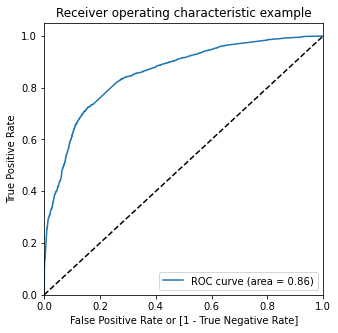

In [184]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.

<h3 style="color:blue"><storng >Finding Optimal Cutoff Point</storng>

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [185]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.915781,3825,1,1,1,1,1,1,1,1,1,1,1
1,1,0.703857,3307,1,1,1,1,1,1,1,1,1,0,0
2,0,0.107872,5527,0,1,1,0,0,0,0,0,0,0,0
3,1,0.316658,5180,0,1,1,1,1,0,0,0,0,0,0
4,1,0.363766,7064,0,1,1,1,1,0,0,0,0,0,0


In [186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382704  1.000000  0.000000
0.1   0.1  0.499283  0.985851  0.197626
0.2   0.2  0.685459  0.897628  0.553922
0.3   0.3  0.765727  0.831877  0.724716
0.4   0.4  0.799968  0.694965  0.865067
0.5   0.5  0.795827  0.638785  0.893189
0.6   0.6  0.778149  0.554723  0.916667
0.7   0.7  0.757127  0.464836  0.938338
0.8   0.8  0.733716  0.353725  0.969298
0.9   0.9  0.709986  0.260092  0.988906


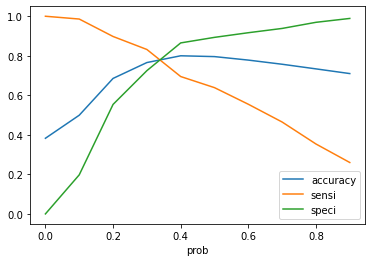

In [187]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [188]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.915781,3825,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.703857,3307,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.107872,5527,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.316658,5180,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.363766,7064,0,1,1,1,1,0,0,0,0,0,0,1


In [189]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.915781,3825,1,92
1,1,0.703857,3307,1,70
2,0,0.107872,5527,0,11
3,1,0.316658,5180,1,32
4,1,0.363766,7064,1,36


In [190]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1999
0     404
Name: final_Predicted, dtype: int64

In [191]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

<h3 style="color:green"><storng >Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.</storng>

<h3 style="color:red"><storng >Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set</storng>

In [192]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7657270265965919

In [193]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2809, 1067],
       [ 404, 1999]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8318768206408655

In [196]:
# Let us calculate specificity
TN / float(TN+FP)

0.7247162022703818

Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

- Accuracy : 77.05%
- Sensitivity :82.89%
- Specificity : 73.49%
 
 Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [197]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.27528379772961814


In [198]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6519895629484671


In [199]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8742608154372861


<h3 style="color:red"><storng >Precision and Recall</storng>

In [200]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2809, 1067],
       [ 404, 1999]], dtype=int64)

In [201]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6519895629484671

In [202]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8318768206408655

In [203]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6519895629484671

In [204]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8318768206408655

<h3 style="color:blue"><storng >Precision and Recall Trade-off</storng>

In [205]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

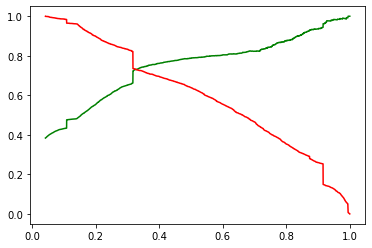

In [206]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### <h3 style="color:red"><storng >Predictions on the test set</storng>

In [207]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
341,-0.280280,0.340866,-0.041537,-0.175072,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5449,-0.280280,-0.042288,0.918562,0.338453,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6360,-0.280280,1.107173,-0.388341,-0.585891,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5091,3.567855,-0.042288,-0.433973,0.338453,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6311,-0.280280,-0.042288,-0.662134,0.338453,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [208]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Source_NC_EDM,Lead Source_NC_EDM,Lead Source_Referral Sites,...,Lead Origin_Lead Import,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Click2call,Lead Source_NC_EDM,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Olark Chat,What is your current occupation_NA,What is your current occupation_Working Professional
341,-0.041537,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5449,0.918562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6360,-0.388341,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5091,-0.433973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6311,-0.662134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
X_test_sm = sm.add_constant(X_test)

In [211]:
X_test_sm.shape

(2691, 26)

In [212]:
y_test_pred = res.predict(X_test_sm)    

In [213]:
y_test_pred[:10]

341     0.099523
5449    0.556726
6360    0.222414
5091    0.213608
6311    0.051902
4897    0.840502
919     0.157175
7281    0.211877
3789    0.347606
6917    0.119635
dtype: float64

In [214]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [215]:
# Let's see the head
y_pred_1.head()

,0
341,0.099523
5449,0.556726
6360,0.222414
5091,0.213608
6311,0.051902


In [216]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [217]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [218]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [219]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [220]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,341,0.099523
1,0,5449,0.556726
2,1,6360,0.222414
3,0,5091,0.213608
4,0,6311,0.051902


In [221]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [222]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,341,0.099523
1,0,5449,0.556726
2,1,6360,0.222414
3,0,5091,0.213608
4,0,6311,0.051902


<h3 style="color:blue"><storng >Assigning Lead Score</storng>

In [223]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [224]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,341,0,0.099523,10
1,5449,0,0.556726,56
2,6360,1,0.222414,22
3,5091,0,0.213608,21
4,6311,0,0.051902,5


In [225]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [226]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,341,0,0.099523,10,0
1,5449,0,0.556726,56,1
2,6360,1,0.222414,22,0
3,5091,0,0.213608,21,0
4,6311,0,0.051902,5,0


In [227]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    814
0    174
Name: final_Predicted, dtype: int64

In [228]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

<h3 style="color:green"><storng >Hence we can see that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)</storng>

<h3 style="color:red"><storng >Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set</storng>

In [229]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7722036417688591

In [230]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1264,  439],
       [ 174,  814]], dtype=int64)

In [231]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [232]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8238866396761133

In [233]:
# Let us calculate specificity
TN / float(TN+FP)

0.7422196124486201

<h3 style="color:red"><storng >Precision and Recall metrics for the test set</storng>

In [234]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6496408619313647

In [235]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8238866396761133

Inference:
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 77.52%
- Sensitivity :83.01%
- Specificity : 74.13%

Conclusion:

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Hence overall this model seems to be good.

Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional
- Total Time Spent on Website